ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

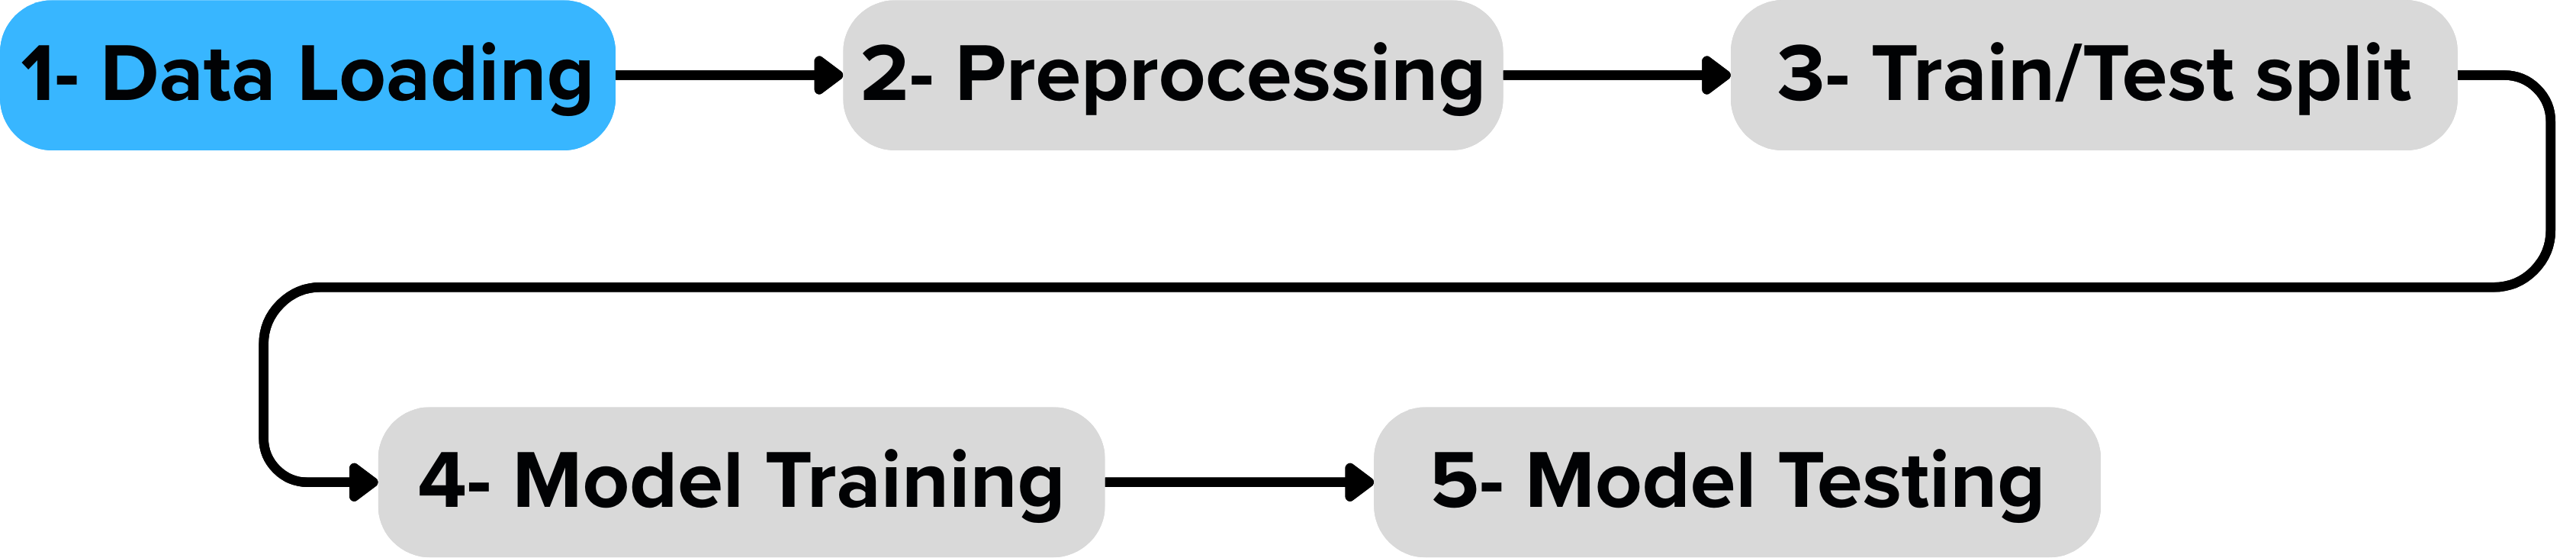

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [2]:
# Load Dataset

df = pd.read_csv(r"C:\Users\haido\Desktop\Lab-3\Data\Dataset.csv")

# Display first 5 rows
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### Check Missing Values

In [3]:
# Check all values
print(df.isna())

       model   year  price  transmission  mileage  fuelType    tax    mpg  \
0      False  False  False         False    False     False  False  False   
1      False  False  False         False    False     False  False  False   
2      False  False  False         False    False     False  False  False   
3      False  False  False         False    False     False  False  False   
4      False  False  False         False    False     False  False  False   
...      ...    ...    ...           ...      ...       ...    ...    ...   
10776  False  False  False         False    False     False  False  False   
10777  False  False  False         False    False     False  False  False   
10778  False  False  False         False    False     False  False  False   
10779  False  False  False         False    False     False  False  False   
10780  False  False  False         False    False     False  False  False   

       engineSize  
0           False  
1           False  
2           Fal

In [4]:
print(df.isna().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


### Check duplicate rows

In [5]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

174     True
393     True
709     True
957     True
1173    True
        ... 
7808    True
9096    True
9797    True
9940    True
9943    True
Length: 117, dtype: bool

### No. of rows and columns

In [6]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (10781, 9) 

number of rows:  10781
number of columns:  9


### Data type of columns

In [7]:
# viewing the data types of columns
df.dtypes

model               str
year              int64
price             int64
transmission        str
mileage           int64
fuelType            str
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [9]:
df['year'] = pd.to_datetime(df['year'])

df.dtypes

model                      str
year            datetime64[ns]
price                    int64
transmission               str
mileage                  int64
fuelType                   str
tax                      int64
mpg                    float64
engineSize             float64
dtype: object

### Descriptive summary Statistics

In [10]:
# Statistical summary
df.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10781,10781,10781.000000,10781,10781.000000,10781,10781.000000,10781.000000,10781.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,3 Series,NaN,NaN,Semi-Auto,NaN,Diesel,NaN,NaN,NaN
freq,2443,NaN,NaN,4666,NaN,7027,NaN,NaN,NaN
mean,NaN,1970-01-01 00:00:00.000002017,22733.408867,NaN,25496.986550,NaN,131.702068,56.399035,2.167767
min,NaN,1970-01-01 00:00:00.000001996,1200.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000
25%,NaN,1970-01-01 00:00:00.000002016,14950.000000,NaN,5529.000000,NaN,135.000000,45.600000,2.000000
50%,NaN,1970-01-01 00:00:00.000002017,20462.000000,NaN,18347.000000,NaN,145.000000,53.300000,2.000000
75%,NaN,1970-01-01 00:00:00.000002019,27940.000000,NaN,38206.000000,NaN,145.000000,62.800000,2.000000
max,NaN,1970-01-01 00:00:00.000002020,123456.000000,NaN,214000.000000,NaN,580.000000,470.800000,6.600000


### Univariate Analysis

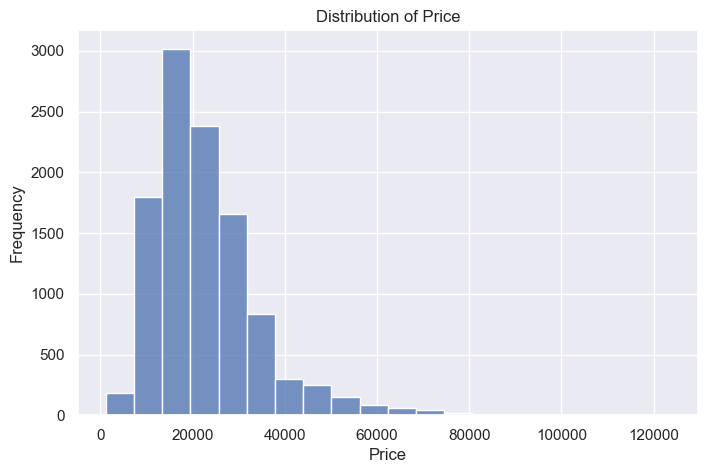

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=20)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

- Shows how car prices are distributed in the dataset
- Right-skewed distribution: many low- to mid-priced cars, few very expensive ones

### Distribution of Mileage

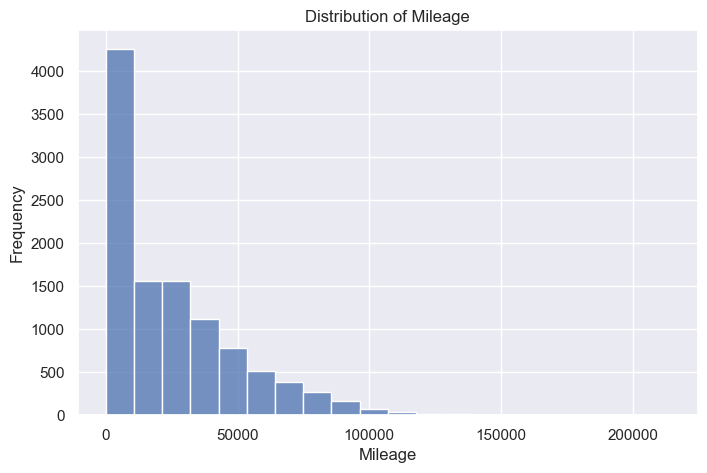

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['mileage'], bins=20)
plt.title("Distribution of Mileage")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()

## Bivariate Analysis

### Average Price by Fuel Type

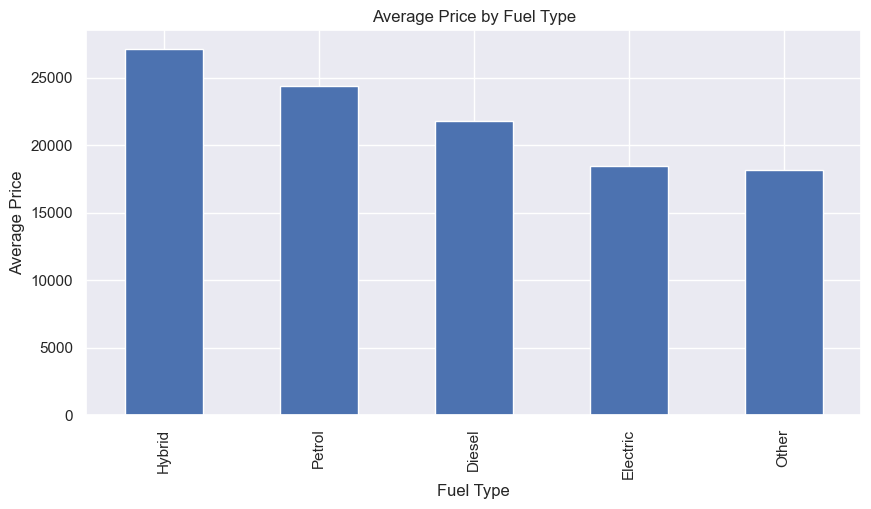

In [17]:
fuel_price = df.groupby('fuelType')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
fuel_price.plot(kind='bar')
plt.title("Average Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.show()


### Total Price by Car Model

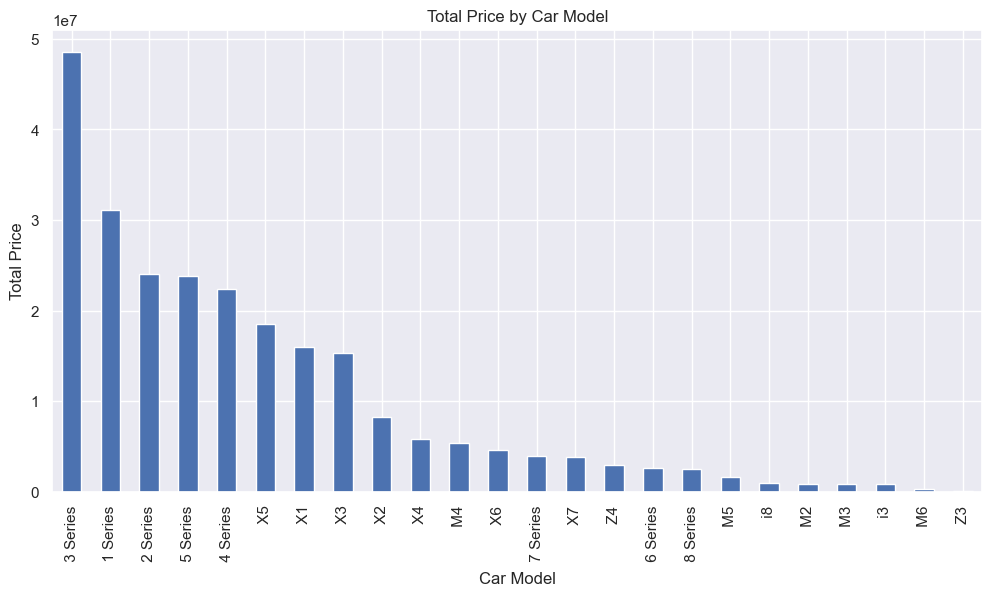

model
3 Series    48568936
1 Series    31152869
2 Series    24013888
5 Series    23799524
4 Series    22385926
X5          18556760
X1          15932518
X3          15294829
X2           8204159
X4           5857119
M4           5409279
X6           4646893
7 Series     3915038
X7           3841352
Z4           2916209
6 Series     2630272
8 Series     2495914
M5           1675040
i8            969214
M2            905947
M3            816204
i3            802686
M6            257520
Z3             40785
Name: price, dtype: int64

In [19]:
model_price = (df.groupby('model')['price'].sum().sort_values(ascending=False))

plt.figure(figsize=(12,6))
model_price.plot(kind='bar')
plt.title("Total Price by Car Model")
plt.xlabel("Car Model")
plt.ylabel("Total Price")
plt.xticks(rotation=90)
plt.show()

model_price

### Average Price by Year

In [20]:
df.groupby('year')['price'].mean().sort_values(ascending=False)


year
1970-01-01 00:00:00.000002020    35377.680764
1970-01-01 00:00:00.000002019    31025.864275
1970-01-01 00:00:00.000002018    22721.656840
1970-01-01 00:00:00.000002017    19267.174898
1970-01-01 00:00:00.000002016    16638.403826
1970-01-01 00:00:00.000002015    15199.753796
1970-01-01 00:00:00.000002014    13323.598802
1970-01-01 00:00:00.000002013    11118.355742
1970-01-01 00:00:00.000002012     9533.689076
1970-01-01 00:00:00.000002003     9222.500000
1970-01-01 00:00:00.000002011     9099.098039
1970-01-01 00:00:00.000002004     8213.166667
1970-01-01 00:00:00.000002010     7490.390244
1970-01-01 00:00:00.000002001     7333.333333
1970-01-01 00:00:00.000002009     6618.100000
1970-01-01 00:00:00.000002008     6240.043478
1970-01-01 00:00:00.000001996     5995.000000
1970-01-01 00:00:00.000002002     5486.500000
1970-01-01 00:00:00.000002005     5390.166667
1970-01-01 00:00:00.000002006     5252.714286
1970-01-01 00:00:00.000002007     4830.500000
1970-01-01 00:00:00.000001997

### Mileage vs Price Relationship

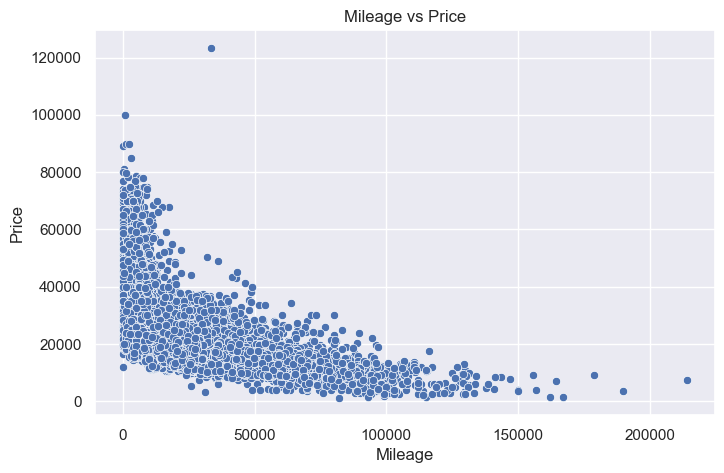

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='mileage', y='price')
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

### Correlation Matrix

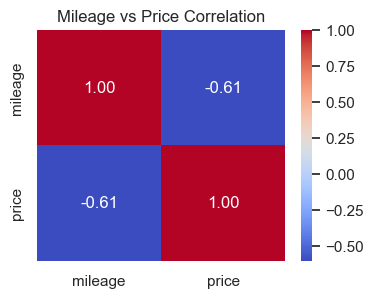

In [22]:
plt.figure(figsize=(4,3))
sns.heatmap(df[['mileage', 'price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mileage vs Price Correlation")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Total Car Price Trend by Year

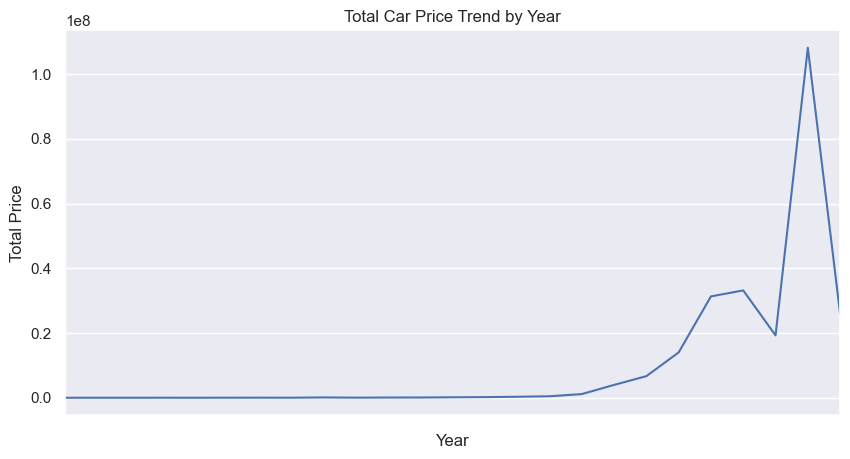

In [23]:
yearly_total_price = (df.groupby('year')['price'].sum().sort_index())

plt.figure(figsize=(10,5))
yearly_total_price.plot()
plt.title("Total Car Price Trend by Year")
plt.xlabel("Year")
plt.ylabel("Total Price")
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.